# World Cup - Data Analyst

World Cup là giải vô địch bóng đá thế giới do Liên đoàn bóng đá thế giới Fifa tổ chức 4 năm 1 lần cho tất cả các đội tuyển bóng đá quốc gia của những nước thành viên Fifa. Giải đầu tiên được tổ chức vào năm 1930, và bị gián đoạn 2 lần vào các năm 1942và 1946 do Chiến tranh thế giới thứ hai.


# 1. Import thư viện và Data

1.1 Import các thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.2 Reading Data

In [3]:
cups = pd.read_csv("D:\data world cup 1930 -2014\WorldCups.csv")
players = pd.read_csv("D:\data world cup 1930 -2014\WorldCupPlayers.csv")
matches = pd.read_csv ("D:\data world cup 1930 -2014\WorldCupMatches.csv")


# Data processing

Trong bảng dữ liệu hiện Germany có 2 tên được ghi nhận là "Germany" và "Germany FR" cần đưa về 1 tên gọi thống nhất là Germany.
 


In [4]:
# loại bỏ các missing values
cups = cups.dropna()
matches= matches.dropna()
players = players.dropna()

In [5]:
# thay ten "Germany FR" bang ten "Germany"
cups = cups.replace("Germany FR", "Germany")
matches = matches.replace ("Germany FR", "Germany")
players = players.replace("Germany FR", "Germany")


In [6]:
#chuyen cot Attendance sang dang interger
cups["Attendance"] = cups["Attendance"].str.replace('.', '').astype('int64')

# Data Overview

In [7]:
display("Worldcup - Data")
display(cups.head(5))
display("Matches - Data")
display(matches.head(5))
display("players - Data")
display(players.head(5))

'Worldcup - Data'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,3757
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


'Matches - Data'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


'players - Data'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
74,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62'
113,201,1098,PER,BRU Francisco (ESP),S,0,Placido GALINDO,C,R70'
415,201,1091,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G67' G83'
468,201,1089,PAR,DURAND LAGUNA Jose (ARG),S,0,Luis VARGAS PENA,C,G40'


In [8]:
cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1974.800000,118.950000,21.250000,41.800000,1.799262e+06
std,25.582889,32.972836,7.268352,17.218717,1.176451e+06
min,1930.000000,70.000000,13.000000,17.000000,3.630000e+02
25%,1957.000000,89.000000,16.000000,30.500000,8.620308e+05
50%,1976.000000,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,145.250000,26.000000,55.000000,2.725173e+06
max,2014.000000,171.000000,32.000000,64.000000,3.587538e+06


In [9]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,8.500000e+02
mean,1985.021176,1.810588,1.022353,45164.800000,0.710588,0.429412,1.068626e+07,6.078489e+07
std,22.431301,1.612125,1.088853,23485.249247,0.937885,0.691752,2.732359e+07,1.105805e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188250e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.184000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [10]:
players.describe()

,RoundID,MatchID,Shirt Number
count,5.730000e+02,5.730000e+02,573.000000
mean,1.560597e+07,8.312118e+07,7.930192
std,3.255266e+07,1.212386e+08,5.405127
min,2.010000e+02,2.500000e+01,0.000000
25%,3.080000e+02,1.391000e+03,4.000000
50%,1.024000e+03,8.746000e+03,8.000000
75%,2.559510e+05,9.741005e+07,10.000000
max,9.741060e+07,3.001865e+08,23.000000


# Attendance

Mỗi kì World Cup luôn thu hút một lượng lớn người theo dõi từ khắp các quốc gia trên thế giới, từ lượng người tới sân theo dõi trực tiếp lẫn những người theo dõi qua truyền hình. Vậy, kì World Cup nào có lượng người đến sân đông nhất và trận đấu nào có lượng người đến sân nhiều nhất trong những trận đấu đã diễn ra?


In [11]:
matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [12]:
# xóa các trận đấu bị trùng, tham chiếu là cột match Id
matches = matches.drop_duplicates(subset="MatchID",keep="first")
print(matches)
#tính tổng số Attendance theo từng năm
attendance = matches.groupby("Year")["Attendance"].sum().reset_index()
attendance.head()

     Year              Datetime           Stage             Stadium  \
0    1930  13 Jul 1930 - 15:00          Group 1             Pocitos   
1    1930  13 Jul 1930 - 15:00          Group 4      Parque Central   
2    1930  14 Jul 1930 - 12:45          Group 2      Parque Central   
3    1930  14 Jul 1930 - 14:50          Group 3             Pocitos   
4    1930  15 Jul 1930 - 16:00          Group 1      Parque Central   
..    ...                   ...             ...                 ...   
831  2014  05 Jul 2014 - 13:00   Quarter-finals    Estadio Nacional   
832  2014  29 Jun 2014 - 13:00      Round of 16    Estadio Castelao   
833  2014  29 Jun 2014 - 17:00      Round of 16    Arena Pernambuco   
834  2014  01 Jul 2014 - 13:00      Round of 16  Arena de Sao Paulo   
835  2014  01 Jul 2014 - 17:00      Round of 16    Arena Fonte Nova   

            City Home Team Name  Home Team Goals  Away Team Goals  \
0    Montevideo          France                4                1   
1    Mont

,Year,Attendance
0,1930,590549.0
1,1934,363000.0
2,1938,375700.0
3,1950,1045246.0
4,1954,768607.0


<Figure size 864x504 with 0 Axes>

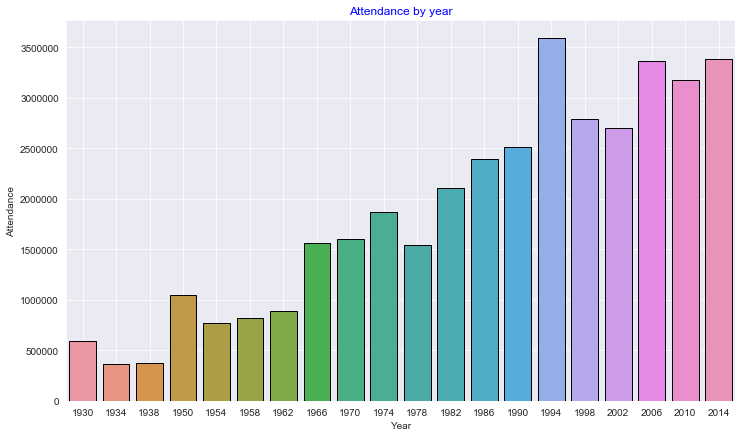

In [13]:
sns.set_style("darkgrid")
attendance["Year"] = attendance["Year"].astype(int)

plt.figure(figsize =(12,7))
plt.figure(figsize=(12,7))
sns.barplot(attendance["Year"], attendance["Attendance"], linewidth =1,edgecolor ="k"*len(attendance))
plt.grid(True)
plt.title("Attendance by year", color ="b")
plt.show()

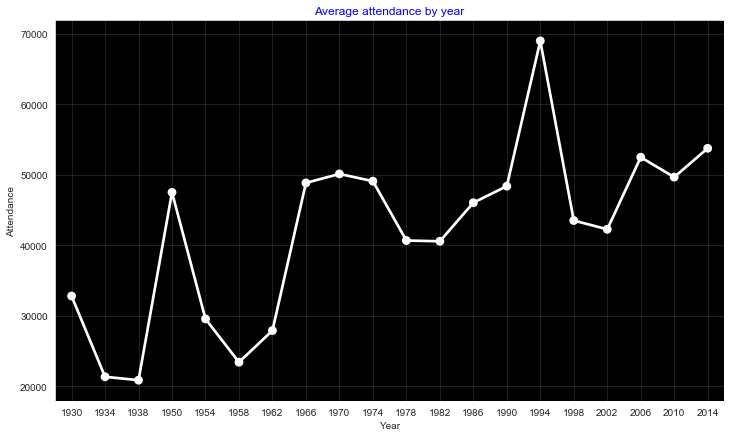

In [14]:
#đồ thị giá trị trung bình lượng khán giả đến sân từng kì world cup

attendance_aver = matches.groupby("Year")["Attendance"].mean().reset_index()
attendance_aver["Year"] = attendance_aver["Year"].astype(int)

plt.figure(figsize = (12,7))
ax = sns.pointplot(attendance_aver["Year"], attendance_aver["Attendance"],color ="w")

ax.set_facecolor("k")

plt.grid(True, color ="grey", alpha =.3)

plt.title("Average attendance by year", color ='b')
plt.show()


In [15]:
# tổng lượng khán giả đến sân theo dõi trực tiếp tính đến năm 2014
print("Tổng lượng khán giả đến sân xem world cup tính đến năm 2014 là:", attendance.sum())
#năm có nhiều khán giả đến sân theo dõi nhất
print("Năm có lượng khán giả đến sân nhiều nhất là:", attendance["Year"][attendance.Attendance ==attendance.Attendance.max()], attendance.Attendance.max())

Tổng lượng khán giả đến sân xem world cup tính đến năm 2014 là: Year             39496.0
Attendance    37457647.0
dtype: float64
Năm có lượng khán giả đến sân nhiều nhất là: 14    1994
Name: Year, dtype: int32 3587538.0


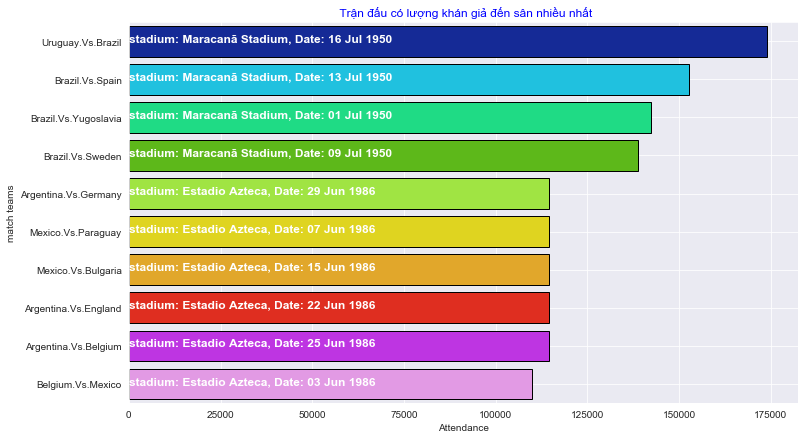

In [18]:


#trận đấu có lượng khán giả đến sân nhiều nhất (top 10)

attendance_matches = matches.sort_values(by ="Attendance",ascending = False)[:10]
attendance_matches = attendance_matches[["Year", "Datetime","Stadium","City", "Home Team Name","Home Team Goals","Away Team Goals", "Away Team Name", "Attendance", "MatchID"]]

attendance_matches["Stadium"] = attendance_matches["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
attendance_matches["Datetime"] = attendance_matches["Datetime"].str.split("-").str[0]
attendance_matches["match"]= attendance_matches["Home Team Name"] + ".Vs."+attendance_matches["Away Team Name"]

plt.figure(figsize = (12,7))
ax = sns.barplot(y=attendance_matches["match"], x = attendance_matches["Attendance"],palette ="gist_ncar", linewidth =1, edgecolor ="k"*len(attendance_matches))

plt.ylabel('match teams')
plt.xlabel('Attendance')

plt.title(" Trận đấu có lượng khán giả đến sân nhiều nhất", color ="b")

plt.grid(True)


# vòng lặp để hiển thị thông tin ngày tháng, địa điểm của từng trận đấu

for i,j in enumerate ("stadium: "+attendance_matches["Stadium"] +", Date: " + attendance_matches["Datetime"]):ax.text(.7, i,j, fontsize =12, color ="white", weight ="bold")

plt.show()


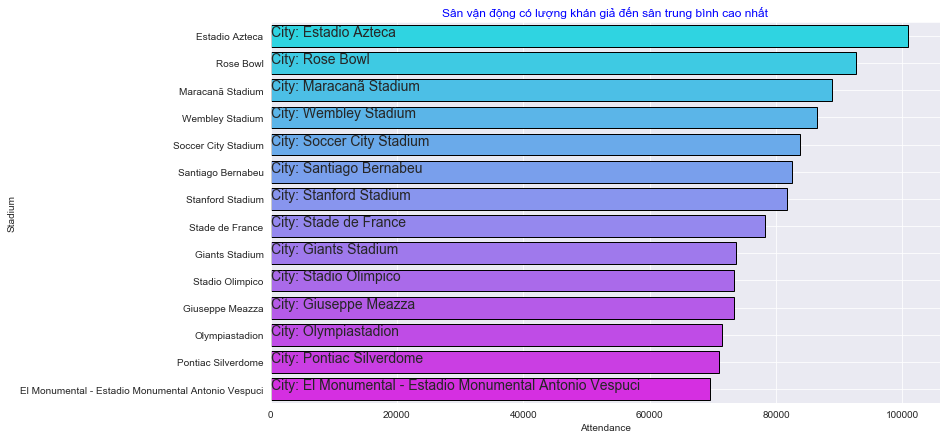

In [20]:
#sân vận động có lượng khán giả đến sân nhiều nhất (top 10)
matches ["Year"] = matches["Year"].astype(int)
matches["Datetime"] = matches["Datetime"].str.split("-").str[0]

matches["Stadium"] = matches["Stadium"].str.replace('Estadio do Maracana',"Maracanã Stadium")
matches["Stadium"] = matches["Stadium"].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")

stadium = matches.groupby(["Stadium", "City"])["Attendance"].mean().reset_index().sort_values(by ="Attendance", ascending =False)

plt.figure(figsize =(12,7))

ax = sns.barplot(y = stadium["Stadium"][:14], x = stadium ["Attendance"][:14], palette ="cool", linewidth = 1, edgecolor ="k"*13)
plt.grid(True)
#dùng vòng lặp để hiển thị tên sân động, tên thành phố chứa sân vận động

for i,j in enumerate ("City: " +stadium["Stadium"][:14]):ax.text(.7,i,j,fontsize =14)

plt.title("Sân vận động có lượng khán giả đến sân trung bình cao nhất", color ='b')

plt.show()


# Goals

đội tuyển ghi được tổng số bàn thắng qua các kì world cup từ 1930 đến 2014 nhiều nhất  

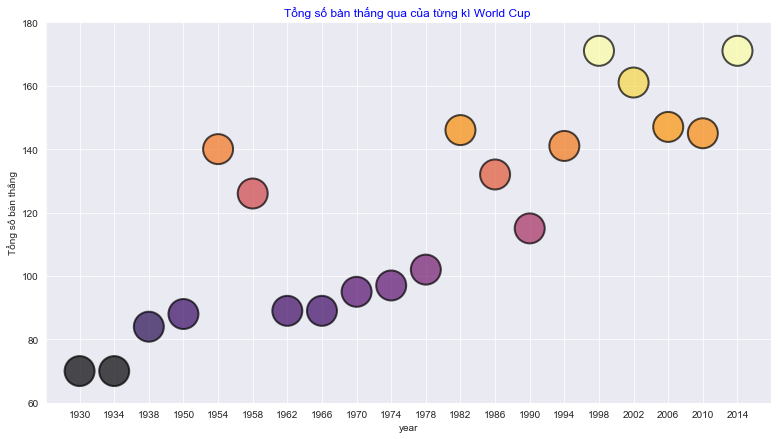

In [33]:
#Tổng số bàn thắng của từng kì World Cup
plt.figure(figsize = (13,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1", "GoalsScored", data = cups, c=cups["GoalsScored"],cmap ="inferno",s=900,alpha =.7, linewidth = 2, edgecolor = "k",)


plt.xticks(cups["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Tổng số bàn thắng qua của từng kì World Cup ', color = 'b')
plt.xlabel ("year")
plt.ylabel("Tổng số bàn thắng")
plt.show()

Text(0.5, 1.0, 'Top 10 nước có tổng số bàn thắng nhiều nhất qua các kì World Cup ')

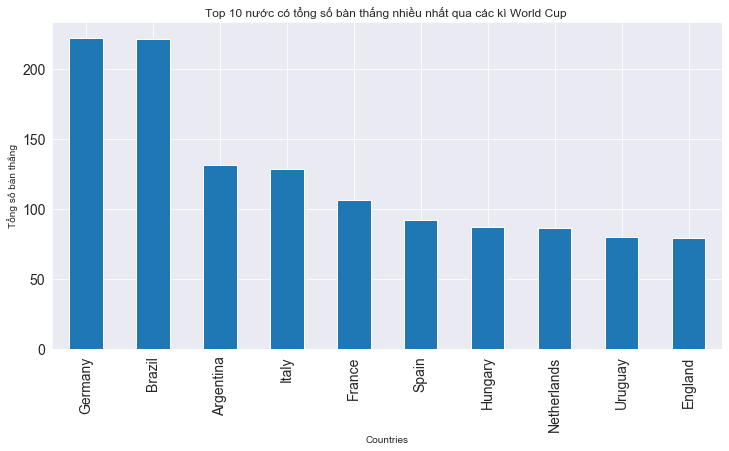

In [35]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Tổng số bàn thắng')
plt.title('Top 10 nước có tổng số bàn thắng nhiều nhất qua các kì World Cup ')

# Team

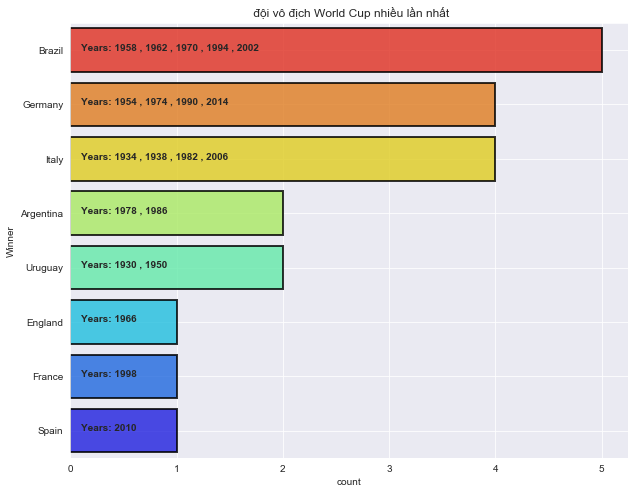

In [37]:
c1 = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2 = cups.groupby("Winner")["Year"].count().reset_index()
c12 = c1.merge(c2,left_on = "Winner", right_on = "Winner", how ="left")
c12 = c12.sort_values(by = "Year", ascending = False)
plt.figure(figsize = (10,8))

ax = sns.barplot("Year", "Winner", data = c12, palette ="jet_r", alpha = .8, linewidth =2,edgecolor ="k"*len(c12))

for i,j in enumerate ("Years: " +c12["Year1"]):ax.text(.1,i,j,weight ="bold")
plt.title(" đội vô địch World Cup nhiều lần nhất")
plt.grid(True)
plt.xlabel("count")
plt.show()

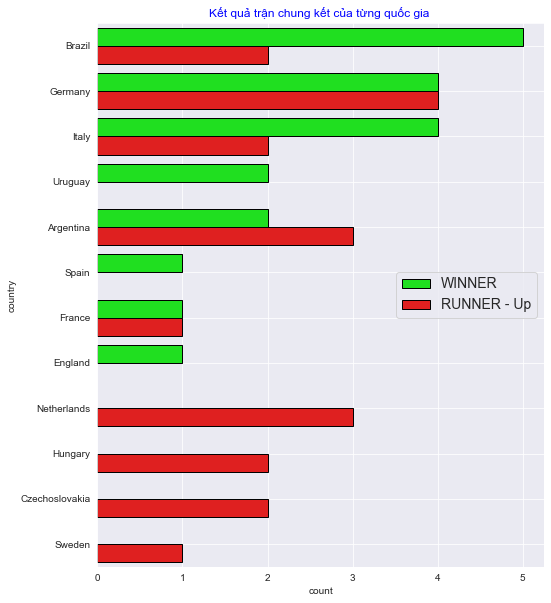

In [38]:
count = cups["Winner"].value_counts().reset_index()
count_w = count.copy()
count_w.columns = ["country","count"]
count_w["type"] ="WINNER"
count_r = cups["Runners-Up"].value_counts().reset_index()
count_r.columns =["country", "count"]
count_r["type"] = "RUNNER - Up"

count_t = pd.concat([count_w, count_r], axis =0)

plt.figure(figsize =(8,10))
sns.barplot("count", "country", data = count_t, hue ="type", palette = ["lime", "r"], linewidth = 1, edgecolor = "k"*len(count_t))

plt.grid(True)
plt.legend(loc = "center right", prop={"size" :14})
plt.title ("Kết quả trận chung kết của từng quốc gia ", color ='b')
plt.show()

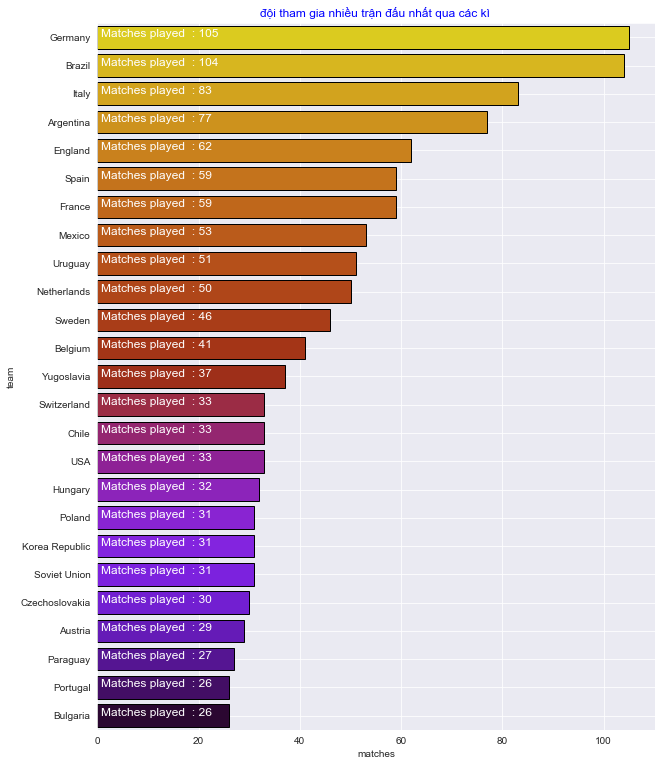

In [41]:
# đội tham gia nhiều trận đấu nhất
ht = matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("đội tham gia nhiều trận đấu nhất qua các kì ",color='b')
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")

C:\Users\Adminis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Adminis\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


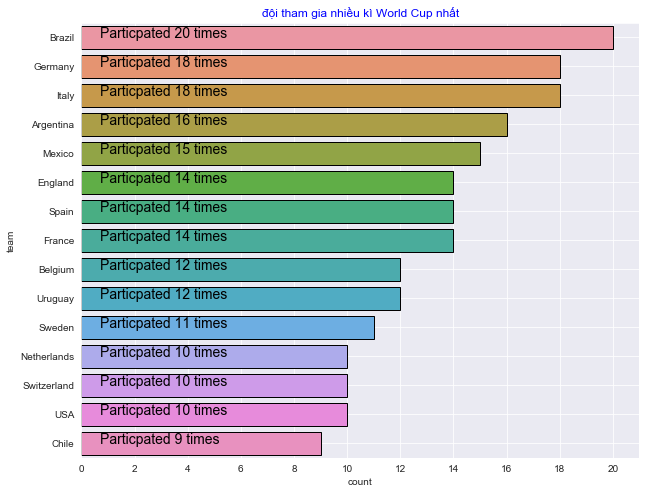

In [42]:
#đội tham gia nhiều kì World Cup nhất
hy = matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],
                 linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k")
plt.grid(True)
    
plt.title("đội tham gia nhiều kì World Cup nhất",color='b')
plt.ylabel("team")
plt.xlabel("count")
plt.xticks(np.arange(0,22,2))
plt.show()